In [52]:
#https://colab.research.google.com/github/pinecone-io/examples/blob/master/semantic_search_intro/bm25.ipynb#scrollTo=XXBU2oy5dokf

BM-25<br>
In this notebook we'll work through the BM25 algorithm, let's put together a few sentences that we can use for measuring matches and similarity.

In [53]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()
d = "green should have smelled more tranquil but somehow it just tasted rotten".split()
e = "joyce enjoyed eating pancakes with ketchup".split()
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled".split()

In [54]:
docs = [a, b, c, d, e, f]

The BM25 algorithm can look intimidating at first, but it's not that different from TF-IDF. Let's start with TF-IDF first.

In [55]:
import numpy as np

def tfidf(word, sentence):
    # term frequency
    tf = sentence.count(word) / len(sentence)
    # inverse document frequency
    idf = np.log10(len(docs) / sum([1 for doc in docs if word in doc]))
    return round(tf*idf, 4)

In [56]:
tfidf('purple', a)  # let's calculate TF-IDF for our query 'purple' and sentence a

0.0973

For BM25, we still calculate both a TF and an IDF component.
<br><br>
The TF component includes the query frequency, and total number of terms as with TF-IDF, but we add two special parameters k and b which we can use to optimize our algorithm, but by default we stick with the values of 1.2 and 0.75 respectively. We also include two new values - avgdl, the average length of all documents, and D, the length of the current document (len(sentence)).
<br><br>
Our new IDF component is similar, it maintains the parametes N and N_q, which are the number of documents and the number of documents that contain our query, respectively. And all we do is add a few values (0.5, 1) here and there.

In [57]:
avgdl = sum(len(sentence) for sentence in [a,b,c,d,e,f]) / len(docs)
N = len(docs)

def bm25(word, sentence, k=1.2, b=0.75):
    # term frequency...
    freq = sentence.count(word)  # or f(q,D) - freq of query in Doc
    tf = (freq * (k + 1)) / (freq + k * (1 - b + b * len(sentence) / avgdl))
    # inverse document frequency...
    N_q = sum([1 for doc in docs if word in doc])  # number of docs that contain the word
    idf = np.log(((N - N_q + 0.5) / (N_q + 0.5)) + 1)
    return round(tf*idf, 4)

In [58]:
bm25('purple', a)

1.7677

In [59]:
bm25('purple', b)

0.0

In [60]:
bm25('bananas', b)

0.8425

In [61]:
bm25('bananas', c)

1.0543

In [62]:
tfidf('bananas', b)

0.0265

In [63]:
tfidf('bananas', c)

0.0434

BM25 Vectors<br>
We can put together sparse vector representations of each sentence using BM25 like so:

In [64]:
vocab = set(a+b+c+d+e+f)
print(vocab)

{'should', 'smelled', 'the', 'been', 'purple', 'you', 'there', 'as', 'tranquil', 'getting', 'joyce', 'was', 'tasted', 'but', 'enjoyed', 'and', 'rotten', 'bananas', 'on', 'it', 'green', 'earth', 'more', 'upset', 'asteroid', 'best', 'have', 'eating', 'your', 'with', 'soggy', 'throwing', 'just', 'canceled', 'ketchup', 'her', 'appointment', 'becky', 'had', 'somehow', 'forest', 'not', 'toward', 'pancakes', 'in', 'often', 'to', 'city', 'hurtled', 'street', 'an', 'dentist', 'is', 'art', 'find', 'way'}


In [65]:
vec = []
# we will create the BM25 vector for sentence 'a'
for word in vocab:
    vec.append(bm25(word, a))
print(vec)

[0.0, 0.0, 0.6664, 0.0, 1.7677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7677, 0.0, 0.0, 0.0, 1.7677, 0.0, 0.0, 1.7677, 0.0, 0.0, 0.0, 0.0, 0.7954, 0.0, 0.0, 0.0]


Visualizing BM25 and TF-IDF<br><br>
So that's how BM25 works, now let's take a visualize the scoring of both TF-IDF and BM25 with a different number of matching terms.

In [66]:
def tfidf_viz(w, s, n_t):
    tf = w / s
    idf = np.log10(len(docs) / n_t)
    return tf, idf

def bm25_viz(w, s, N_t, k=1.2, b=0.75):
    tf = (w * (k + 1)) / (w + k * (1 - b + b * (s / avgdl)))
    idf = np.log10(((N - N_t + 0.5) / (N_t + 0.5)) + 1)
    return tf, idf

We'll run through our functions and output scores for term frequencies from 1 up to 11*.

In [67]:
tfidf_scores = []
bm25_scores = []

for i in range(12):
    tfidf_scores.append(tfidf_viz(i, avgdl, 2))
    bm25_scores.append(bm25_viz(i, avgdl, 2))

In [68]:
import matplotlib.pyplot as plt

We'll visualize TF and IDF seperately first.

In [69]:
tfidf_tf = [x[0] for x in tfidf_scores]
tfidf_idf = [x[1] for x in tfidf_scores]

bm25_tf = [x[0] for x in bm25_scores]
bm25_idf = [x[1] for x in bm25_scores]

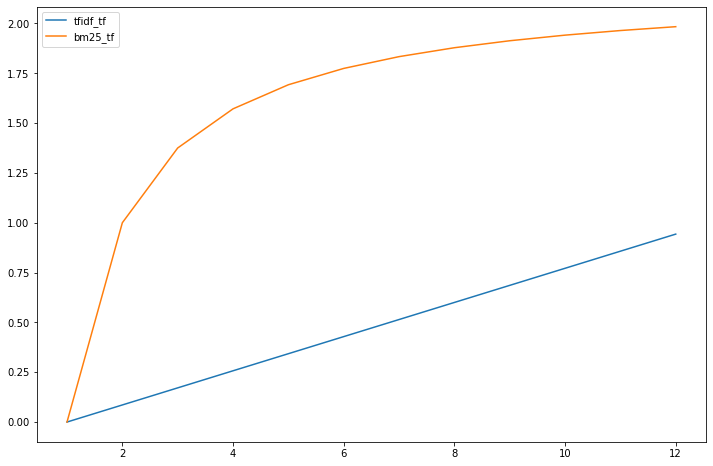

In [70]:
plt.figure(figsize=(12, 8))

plt.plot(list(range(1, len(tfidf_tf)+1)), tfidf_tf, label="tfidf_tf")
plt.plot(list(range(1, len(bm25_tf)+1)), bm25_tf, label="bm25_tf")
plt.legend(loc="upper left")
plt.show()

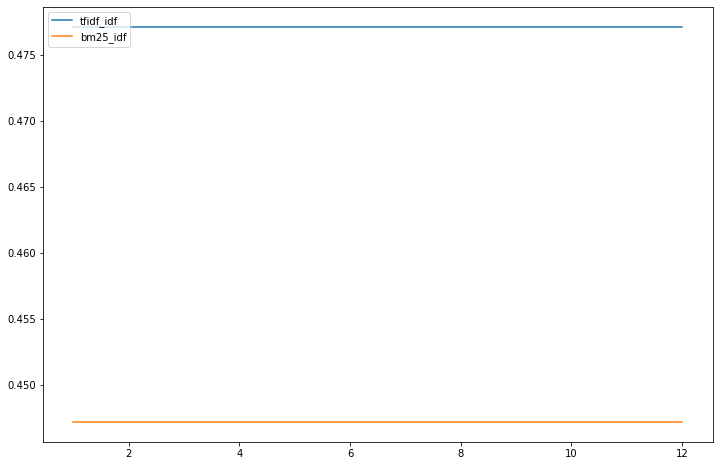

In [71]:
plt.figure(figsize=(12, 8))

plt.plot(list(range(1, len(tfidf_idf)+1)), tfidf_idf, label="tfidf_idf")
plt.plot(list(range(1, len(bm25_idf)+1)), bm25_idf, label="bm25_idf")
plt.legend(loc="upper left")
plt.show()

In [72]:
# calculate full tf*idf
tfidf_tfidf = [tf*idf for tf, idf in zip(tfidf_tf, tfidf_idf)]
bm25_tfidf = [tf*idf for tf, idf in zip(bm25_tf, bm25_idf)]

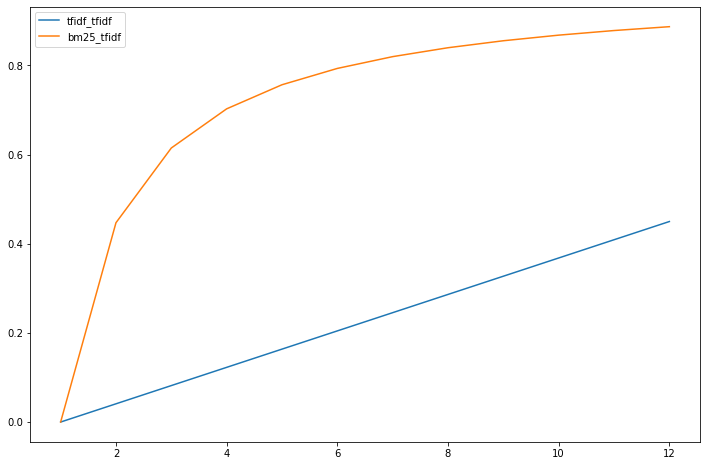

In [73]:
plt.figure(figsize=(12, 8))

plt.plot(list(range(1, len(tfidf_tfidf)+1)), tfidf_tfidf, label="tfidf_tfidf")
plt.plot(list(range(1, len(bm25_tfidf)+1)), bm25_tfidf, label="bm25_tfidf")
plt.legend(loc="upper left")
plt.show()

In our ~12 token sentence, doubling the number of relevant tokens from 2 to 4 doubles the TFIDF score, but for BM25 it increases by a factor of 1.25. Going further, while the TFIDF score doubles with every doubling of relevant tokens, the scaling factor of BM25 decreases. From 4 to 8 tokens the factors are x2 and x1.13 respectively.

| # of relevant tokens | TF*IDF | BM25 |
| --- | --- | --- |
| 1 | 0.04 | 0.45 |
| 2 | 0.08 | 0.61 |
| 4 | 0.16 | 0.76 |
| 8 | 0.33 | 0.86 |

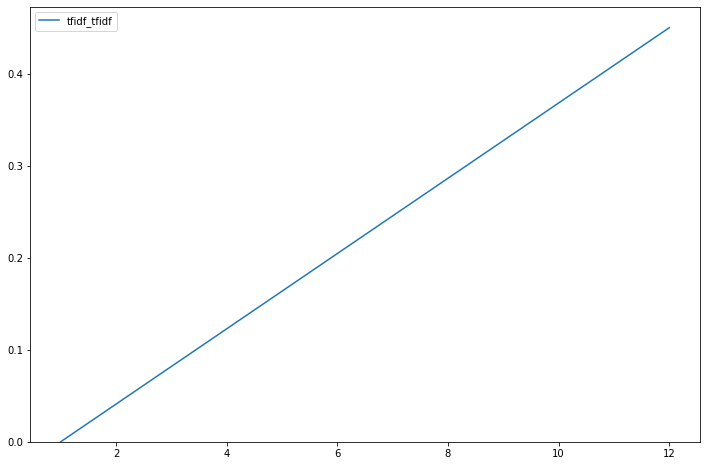

In [74]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(1, len(tfidf_tfidf)+1)), tfidf_tfidf, label="tfidf_tfidf")
plt.ylim(0, plt.ylim()[-1])
plt.legend(loc="upper left")
plt.show()

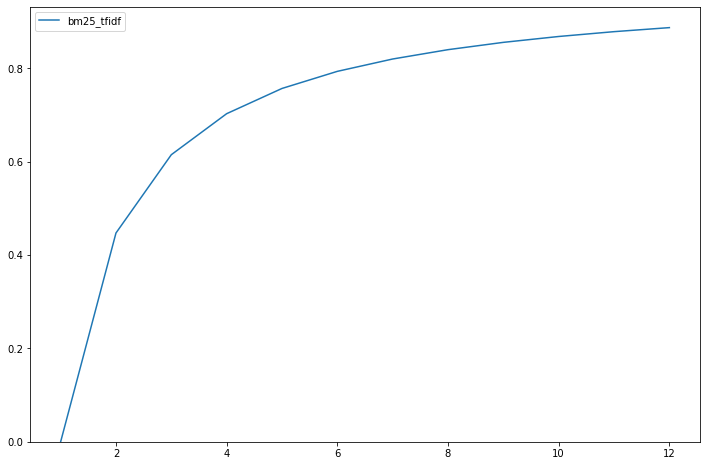

In [75]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(1, len(bm25_tfidf)+1)), bm25_tfidf, label="bm25_tfidf")
plt.ylim(0, plt.ylim()[-1])
plt.legend(loc="upper left")
plt.show()